In [1]:
import pandas as pd

In [2]:
path="/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv"
data=pd.read_csv(path)

In [3]:
data.head()

,Unnamed: 0,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_encoded,attacking_work_rate_encoded,defensive_work_rate_encoded,player_role
0,152778,33,70,56,63,60.0,63,55.0,27,56,...,23.0,13,11,6,9,14,1,1.0,0.0,4
1,19589,67,67,57,66,69.0,80,67.0,73,58,...,21.0,15,7,8,7,11,1,1.0,0.0,6
2,1327,49,78,71,63,56.0,74,45.0,43,49,...,21.0,6,14,13,8,6,1,1.0,1.0,4
3,56972,51,42,75,68,42.0,47,47.0,41,67,...,69.0,11,15,15,12,7,1,1.0,2.0,1
4,180207,51,66,55,57,60.0,64,50.0,39,48,...,12.0,11,12,12,12,7,1,1.0,1.0,4


In [4]:
data=data.drop(columns=['Unnamed: 0','attacking_work_rate_encoded','defensive_work_rate_encoded'])

In [5]:
data.shape

(11060, 35)

In [6]:
data.size

387100

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [8]:
X=data.drop(columns=["player_role"])
y=data['player_role']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
scaler=StandardScaler()


In [11]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)

In [12]:
X_test=scaler.fit_transform(X_test)

In [13]:
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X.columns)

In [14]:
X_train.isnull().sum()

,0
crossing,0
finishing,0
heading_accuracy,0
short_passing,0
volleys,0
dribbling,0
curve,0
free_kick_accuracy,0
long_passing,0
ball_control,0


In [15]:
knn=KNeighborsClassifier(n_neighbors=27)

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=27)

In [17]:
y_pred = knn.predict(X_test)
y_train_pred=knn.predict(X_train)
print("Test Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 78.75226039783001
Training Accuracy: 79.33996383363471

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       0.75      0.84      0.80       413
           2       0.73      0.61      0.67       153
           3       0.60      0.40      0.48       156
           4       0.80      0.91      0.85      1079
           5       0.81      0.40      0.54        65
           6       1.00      0.08      0.15        72
           7       0.65      0.47      0.54        88

    accuracy                           0.79      2212
   macro avg       0.79      0.59      0.63      2212
weighted avg       0.79      0.79      0.77      2212


Confusion Matrix:
 [[186   0   0   0   0   0   0   0]
 [  0 348  14  12  39   0   0   0]
 [  0  26  94   2  31   0   0   0]
 [  0  43   8  62  42   1   0   0]
 [  0  44  12  25 979   4   0  15]
 [  0   0   0   2  33  26   0   4]
 [  0   0   1   0  61   

In [18]:
train_acc = []
test_acc = []
k_values = range(1, 31)

# Loop over k values
for k in k_values:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(X_train, y_train)
    y_train_pred = knn1.predict(X_train)
    y_test_pred = knn1.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

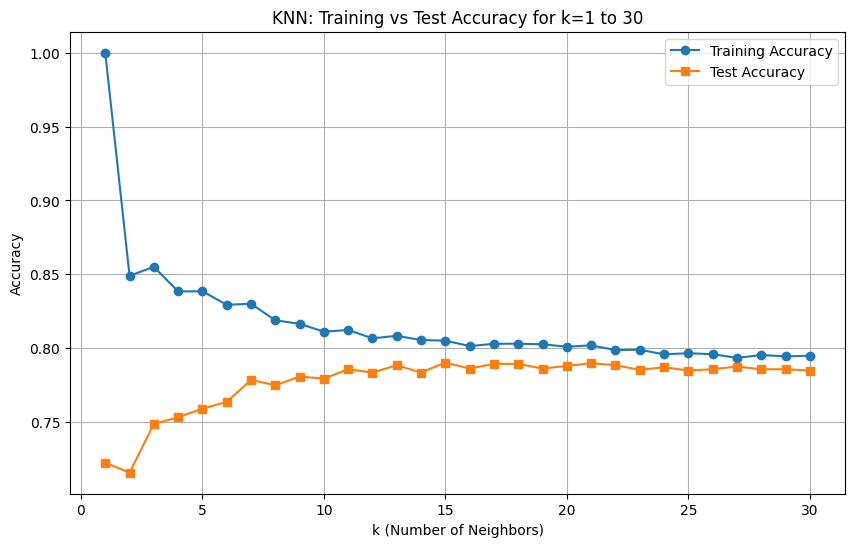

In [20]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_acc, label='Training Accuracy', marker='o')
plt.plot(k_values, test_acc, label='Test Accuracy', marker='s')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN: Training vs Test Accuracy for k=1 to 30')
plt.legend()
plt.grid(True)
plt.show()

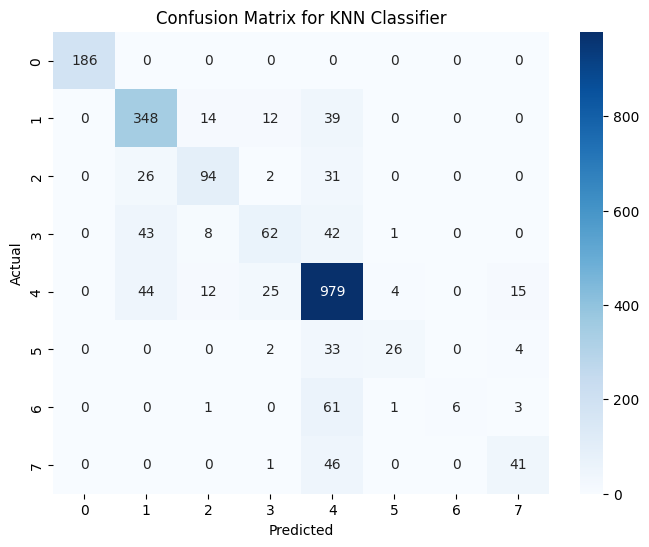

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
pd.Series(y_pred).to_csv('knn_y_pred.csv', index=False)
